In [2]:
from jsonschema import validate

In [3]:
schema = {"type" : "object",
          "properties" : {
              "price" : {"type" : "number"},
              "name" : {"type" : "string"},
          },
         }

In [15]:
print(validate(instance={"name" : "Eggs", "price" : 8.77}, schema=schema))

None


In [23]:
v = None
try:
    validate(instance={"name" : "Eggs", "price" : "invalid"}, schema=schema)
    print('ok')
except:
    print('error')

error


In [51]:
import ruptures as rpt
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [162]:
data = '''[
{"name" : "Eggs", "price" : 7},
{"name" : "Eggs", "price" : 7},
{"name" : "Eggs", "price" : 6.55},
{"name" : "E", "price" : 8.89},
{"name" : "Eggs", "price" : 7.44},
{"name" : "Eggs", "price" : 15.77},
{"name" : "Eggs", "price" : 14},
{"name" : "Eggs", "price" : 15},
{"name" : "Eggs", "price" : 13},
{"name" : "Eggs", "price" : 15},
{"name" : "Eggs", "price" : 14.55},
{"name" : "Eggs", "price" : 14.5},
{"name" : "Eggs", "price" : 15.77},
{"name" : "Eggs", "price" : 14},
{"name" : "Eggs", "price" : 15},
{"name" : "Eggs", "price" : 13},
{"name" : "Eggs", "price" : 15},
{"name" : "Eggs", "price" : 14.55},
{"name" : "Eggs", "price" : 14.5},
{"name" : "E", "price" : 8.89},
{"name" : "Eggs", "price" : 7.44},
{"name" : "Eggs", "price" : 8.44},
{"name" : "Eggs", "price" : 7.21},
{"name" : "Eggs", "price" : -10},
{"name" : "Eggs", "price" : -8},
{"name" : "Eggs", "price" : -7},
{"name" : "E", "price" : -7.5},
{"name" : "Eggs", "price" : 7.44},
{"name" : "Eggs", "price" : 8.44},
{"name" : "Eggs", "price" : 7.21}
]'''

In [163]:
samples = json.loads(data)

In [164]:
prices = []
for sample in samples:
    prices.append(len(sample["name"]))

In [165]:
prices = []
for sample in samples:
    prices.append(sample["price"])

In [166]:
prices = np.array(prices)
prices

array([  7.  ,   7.  ,   6.55,   8.89,   7.44,  15.77,  14.  ,  15.  ,
        13.  ,  15.  ,  14.55,  14.5 ,  15.77,  14.  ,  15.  ,  13.  ,
        15.  ,  14.55,  14.5 ,   8.89,   7.44,   8.44,   7.21, -10.  ,
        -8.  ,  -7.  ,  -7.5 ,   7.44,   8.44,   7.21])

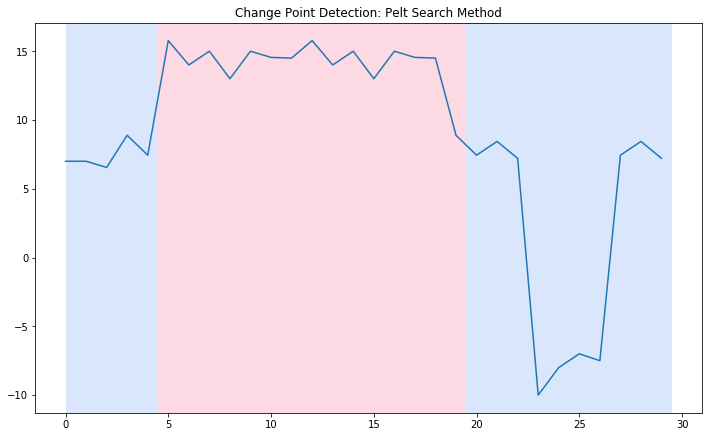

In [169]:
model="rbf"
algo = rpt.Pelt(model=model).fit(prices)
result = algo.predict(pen=2)
rpt.display(prices, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()

In [170]:
print(result)

[5, 20, 30]


ValueError: too many values to unpack (expected 1)

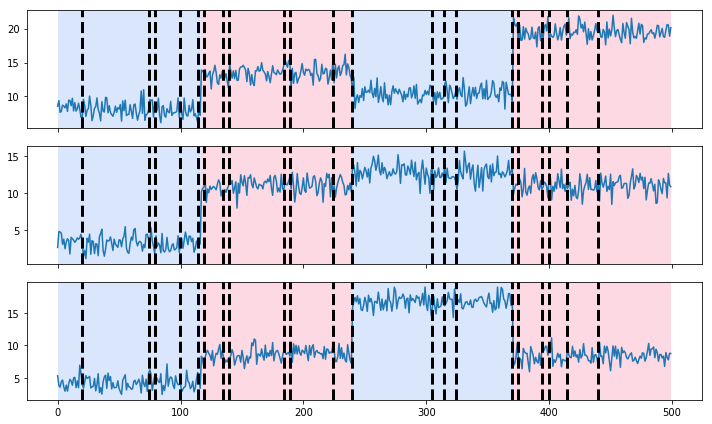

In [106]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

# creation of data
n, dim = 500, 3
n_bkps, sigma = 3, 1
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal)
my_bkps = algo.predict(pen=3)

# show results
fig, (ax,) = rpt.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

In [107]:
my_bkps

[20,
 75,
 80,
 100,
 115,
 120,
 135,
 140,
 185,
 190,
 225,
 240,
 305,
 315,
 325,
 370,
 375,
 395,
 400,
 415,
 440,
 500]